Data Analysis of Food Truck Frenzy


Load Data, and check first few rows to ensure correct data file was loaded.

In [21]:
import pandas as pd

# Load the data files
food_truck_sales_data = pd.read_csv('datafiles/FoodTruckSalesData.csv')
item_prices_data = pd.read_csv('datafiles/ItemPrices.csv')
# Display the first few rows of each DataFrame
food_truck_sales_data.head(), item_prices_data.head()

(     Date     Location    Item  Quantity Sold
 0  2/9/24  TimesSquare  Burger             99
 1  2/9/24  TimesSquare   Fries             46
 2  2/9/24  TimesSquare    Soda             47
 3  2/9/24  TimesSquare   Water             31
 4  2/9/24  TimesSquare   Salad            133,
       Location    Item  SalePrice  ItemCost  GrossProfit
 0  TimesSquare  Burger        8.0      6.50         1.50
 1  TimesSquare   Fries        3.0      1.80         1.20
 2  TimesSquare    Soda        2.0      0.75         1.25
 3  TimesSquare   Water        3.0      0.75         2.25
 4  TimesSquare   Salad        7.0      4.90         2.10)

In [20]:
print("\nData Types and Missing Values:")
print(food_truck_sales_data.info())
print(item_prices_data.info())


Data Types and Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           1350 non-null   object
 1   Location       1350 non-null   object
 2   Item           1350 non-null   object
 3   Quantity Sold  1350 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 42.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Location     15 non-null     object 
 1   Item         15 non-null     object 
 2   SalePrice    15 non-null     float64
 3   ItemCost     15 non-null     float64
 4   GrossProfit  15 non-null     float64
dtypes: float64(3), object(2)
memory usage: 732.0+ bytes
None


Calcuate Total Sales per Item and Location

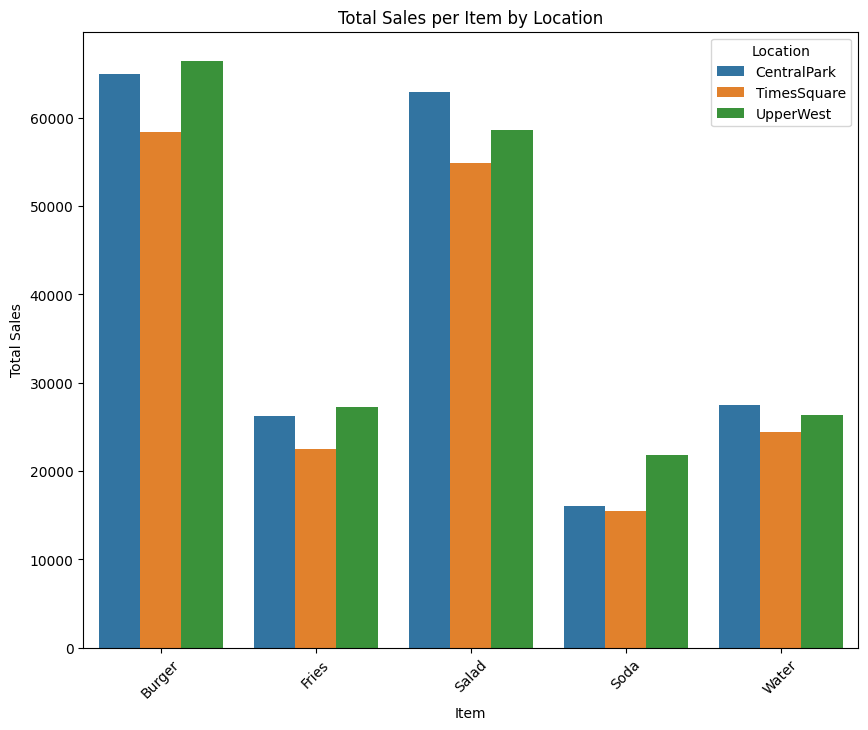

In [12]:
from matplotlib import pyplot as plt
import seaborn as sns

merged_data = pd.merge(food_truck_sales_data, item_prices_data, on=['Location','Item'])
merged_data['TotalSales'] = merged_data['Quantity Sold'] * merged_data['SalePrice']
total_sales = merged_data.groupby(['Location', 'Item'])['TotalSales'].sum().reset_index()

plt.figure(figsize=(10,8))
sns.barplot(data=total_sales, x='Item', y='TotalSales', hue='Location')
plt.title('Total Sales per Item by Location')
plt.xlabel('Item')
plt.ylabel('Total Sales')
plt.legend(title='Location')
plt.xticks(rotation=45)
plt.show()


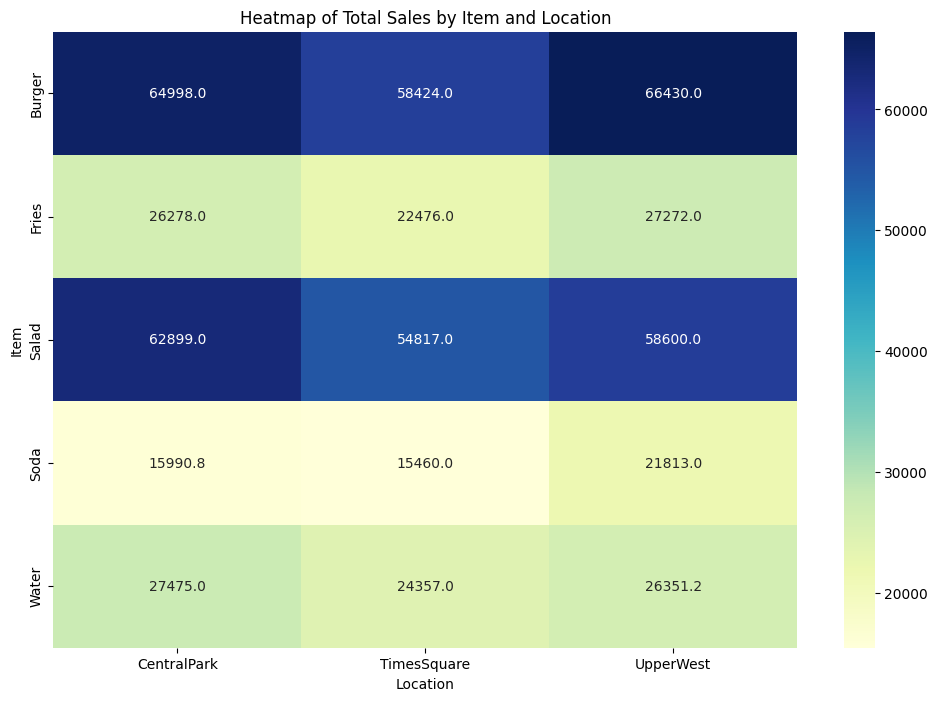

In [16]:
pivot_table = total_sales.pivot(index="Item", columns="Location", values="TotalSales")

plt.figure(figsize=(12,8))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('Heatmap of Total Sales by Item and Location')
plt.xlabel('Location')
plt.ylabel('Item')
plt.show()

In [17]:
total_sales_summary = total_sales.groupby('Location')['TotalSales'].sum().reset_index()
print(total_sales_summary)

      Location  TotalSales
0  CentralPark   197640.75
1  TimesSquare   175534.00
2    UpperWest   200466.25


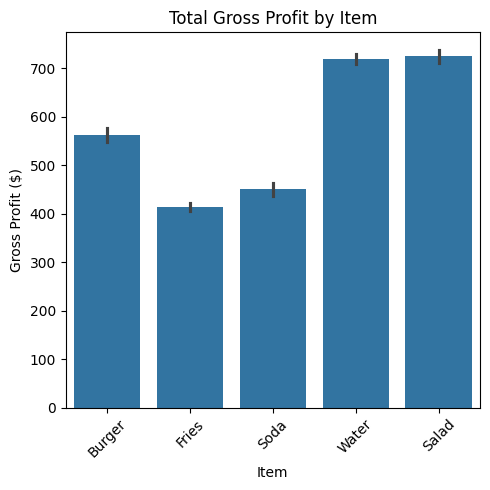

In [28]:
##Profitability by Item

# Plotting profitability by item type
plt.figure(figsize=(5, 5))
sns.barplot(x='Item', y='GrossProfit', data=merged_data, estimator=sum)
plt.title('Total Gross Profit by Item')
plt.xlabel('Item')
plt.ylabel('Gross Profit ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


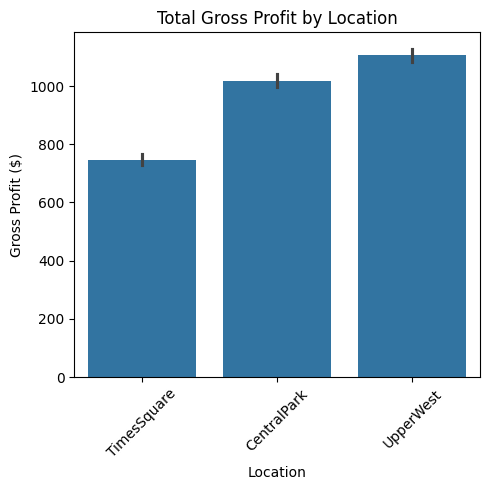

In [29]:
##Profitability by Location

# Plotting profitability by item type
plt.figure(figsize=(5, 5))
sns.barplot(x='Location', y='GrossProfit', data=merged_data, estimator=sum)
plt.title('Total Gross Profit by Location')
plt.xlabel('Location')
plt.ylabel('Gross Profit ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
